## Preprocess Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [3]:
import_df = pd.read_csv('market_data.csv')
import_df.head()

,Date,SP 500 Change %,UST 2yr Change %,UST 10yr Change %,Euro Bond Vol.,Euro Bond Change %,Gold Vol.,Gold Change %,Crude Oil Vol.,Crude Oil Change %,Dollar Index Vol.,Dollar Index Change %,VIX Change %,UST 10yr Direction
0,2008-12-29,-0.0039,-0.1356,-0.0154,132.15,0.0034,0.13,0.0048,150.60,0.0613,3.80,-0.0020,0.0120,0
1,2008-12-30,0.0244,-0.0753,-0.0228,163.39,-0.0041,0.14,-0.0061,137.26,-0.0247,1.70,0.0031,-0.0517,0
2,2009-01-02,0.0316,0.0768,0.0635,212.35,0.0035,0.05,-0.0054,184.68,0.0390,2.88,0.0080,-0.0203,1
3,2009-01-05,-0.0047,-0.0617,0.0525,428.41,-0.0050,0.04,-0.0246,258.76,0.0533,4.45,0.0093,-0.0028,1
4,2009-01-06,0.0078,0.0039,-0.0141,567.17,-0.0098,0.11,0.0096,331.31,-0.0047,5.95,0.0017,-0.0133,0


In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [5]:
X = import_df.iloc[:-1,1:-1]
y = import_df.iloc[1:,-1]

X_scaled = scaler.fit_transform(X)

In [6]:
X.head()

,SP 500 Change %,UST 2yr Change %,UST 10yr Change %,Euro Bond Vol.,Euro Bond Change %,Gold Vol.,Gold Change %,Crude Oil Vol.,Crude Oil Change %,Dollar Index Vol.,Dollar Index Change %,VIX Change %
0,-0.0039,-0.1356,-0.0154,132.15,0.0034,0.13,0.0048,150.60,0.0613,3.80,-0.0020,0.0120
1,0.0244,-0.0753,-0.0228,163.39,-0.0041,0.14,-0.0061,137.26,-0.0247,1.70,0.0031,-0.0517
2,0.0316,0.0768,0.0635,212.35,0.0035,0.05,-0.0054,184.68,0.0390,2.88,0.0080,-0.0203
3,-0.0047,-0.0617,0.0525,428.41,-0.0050,0.04,-0.0246,258.76,0.0533,4.45,0.0093,-0.0028
4,0.0078,0.0039,-0.0141,567.17,-0.0098,0.11,0.0096,331.31,-0.0047,5.95,0.0017,-0.0133


In [7]:
y.head()

1    0
2    1
3    1
4    0
5    1
Name: UST 10yr Direction, dtype: int64

In [8]:
market_df = pd.concat([X, y.reset_index()], axis=1)
market_df.drop('index', inplace=True, axis=1)
market_df.columns = list(market_df.columns)[:-1] + ['UST10 Next Day Direction']
market_df.head()

,SP 500 Change %,UST 2yr Change %,UST 10yr Change %,Euro Bond Vol.,Euro Bond Change %,Gold Vol.,Gold Change %,Crude Oil Vol.,Crude Oil Change %,Dollar Index Vol.,Dollar Index Change %,VIX Change %,UST10 Next Day Direction
0,-0.0039,-0.1356,-0.0154,132.15,0.0034,0.13,0.0048,150.60,0.0613,3.80,-0.0020,0.0120,0
1,0.0244,-0.0753,-0.0228,163.39,-0.0041,0.14,-0.0061,137.26,-0.0247,1.70,0.0031,-0.0517,1
2,0.0316,0.0768,0.0635,212.35,0.0035,0.05,-0.0054,184.68,0.0390,2.88,0.0080,-0.0203,1
3,-0.0047,-0.0617,0.0525,428.41,-0.0050,0.04,-0.0246,258.76,0.0533,4.45,0.0093,-0.0028,0
4,0.0078,0.0039,-0.0141,567.17,-0.0098,0.11,0.0096,331.31,-0.0047,5.95,0.0017,-0.0133,1


## Clustering

#### K-means

In [32]:
new_rows = list(market_df.columns[:-1])
new_rows

['SP 500 Change %',
 'UST 2yr Change %',
 'UST 10yr Change %',
 'Euro Bond Vol.',
 'Euro Bond Change %',
 'Gold Vol.',
 'Gold Change %',
 'Crude Oil Vol.',
 'Crude Oil Change %',
 'Dollar Index Vol.',
 'Dollar Index Change %',
 'VIX Change %']

In [33]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42).fit(X_scaled)
market_df['2-means Label'] = kmeans.labels_

In [34]:
kmeans_dict = {}
cluster_distances = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X_scaled)
    market_df[f'{k}-means Label'] = kmeans.labels_
    
    plot_df = pd.DataFrame(index=new_rows, columns=[f'Label {k_}' for k_ in range(k)])
    for n in range(k):
        for m in range(len(new_rows)):
            plot_df.iloc[m,n] = market_df[market_df[f'{k}-means Label'] == n].iloc[:,m+1].mean()
    kmeans_dict[k] = plot_df
    
    cluster_distances.append(np.amin(kmeans.transform(X_scaled), axis=1).sum())

In [35]:
k_distance = pd.DataFrame()
k_distance['Cluster Distances'] = cluster_distances
k_distance['K-means'] = range(2,11)
k_distance.index = k_distance['K-means']
k_distance.drop('K-means', axis=1)

,Cluster Distances
K-means,
2,6057.728487
3,5837.695846
4,5672.369470
5,5497.065650
6,5368.159185
7,5227.417074
8,5125.366262
9,5046.776549
10,4992.509304


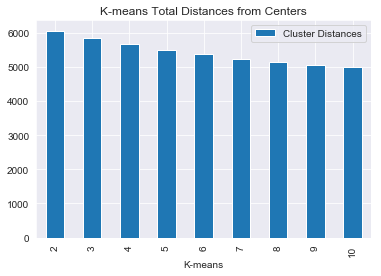

In [36]:
k_distance.plot.bar(x='K-means', title='K-means Total Distances from Centers')

In [13]:
kmeans_dict[5]

,Label 0,Label 1,Label 2,Label 3,Label 4
SP 500 Change %,-0.0182279,-0.0443267,0.0499179,-0.0103558,0.0104728
UST 2yr Change %,-0.0088298,-0.0269551,0.0260819,-0.00218605,0.00427
UST 10yr Change %,617.55,513.914,576.748,624.693,426.032
Euro Bond Vol.,0.00126356,0.00374815,-0.0031255,0.000604651,-0.00039186
Euro Bond Change %,0.447974,0.669424,0.463526,62.2981,0.453116
Gold Vol.,0.00218882,-0.00186337,-0.0018243,2.32558e-06,-0.00029907
Gold Change %,256.223,344.368,277.106,336.155,510.248
Crude Oil Vol.,-0.00099057,-0.0215786,0.012091,-0.000144186,0.00115977
Crude Oil Change %,20.8902,30.1065,22.9643,25.5395,37.1188
Dollar Index Vol.,-0.000922352,0.00425103,-0.000194024,0.000406977,0.00010907


In [14]:
def plot_kmeans_avg_values(k):
    fig, ax = plt.subplots(3,4, figsize=(12,10), constrained_layout=True)
    #fig.suptitle('Average Feature Value by Label', fontsize=14)
    for i in range(3):
        for j in range(4):
            kmeans_dict[k].iloc[(i*4)+j,:].plot.bar(ax=ax[i,j], rot=0)
            ax[i,j].set_title(new_rows[(i*4)+j])

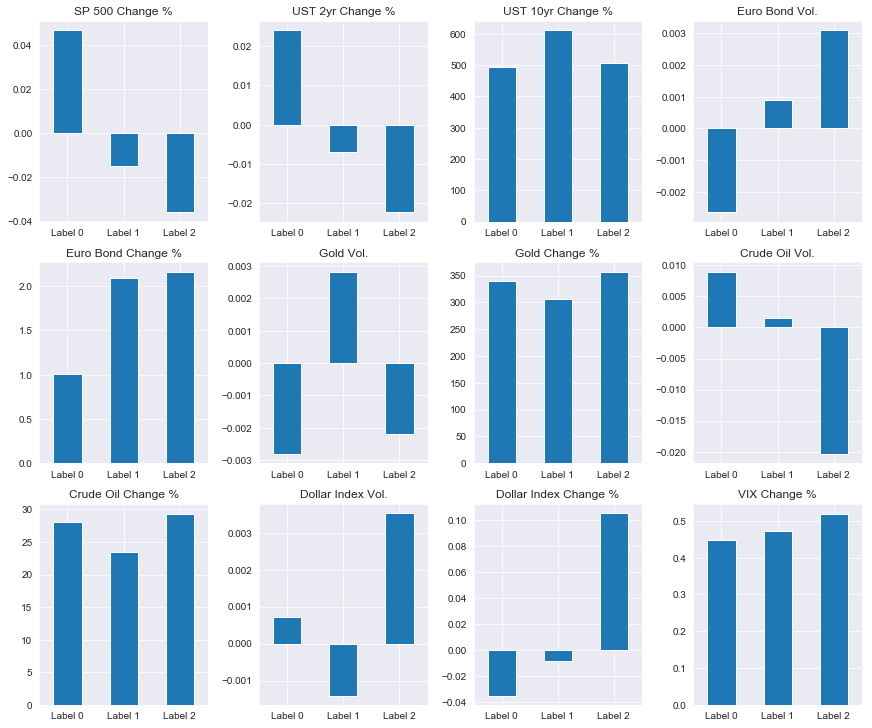

In [15]:
plot_kmeans_avg_values(3)

In [153]:
'''
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X_market_scaled)
    market_df[f'{k}-means Label'] = kmeans.labels_
    
    print(f'K={k}:')
    for i in range(k):
        print(f'\tLabel {i}:')
        for j in range(1,13):
            col_string = f'{k}-means Label'
            print(f'\t\t{market_df.columns[j]}: {round(market_df[market_df[col_string] == i].iloc[:,j].mean(),4)}')
'''

"\nfor k in range(2,11):\n    kmeans = KMeans(n_clusters=k, random_state=42).fit(X_market_scaled)\n    market_df[f'{k}-means Label'] = kmeans.labels_\n    \n    print(f'K={k}:')\n    for i in range(k):\n        print(f'\tLabel {i}:')\n        for j in range(1,13):\n            col_string = f'{k}-means Label'\n            print(f'\t\t{market_df.columns[j]}: {round(market_df[market_df[col_string] == i].iloc[:,j].mean(),4)}')\n"

961

## Dimensionality Reduction

#### PCA

In [12]:
from sklearn.decomposition import PCA

pca = PCA()#n_components=3)
market_pca = pca.fit_transform(X_scaled)


In [13]:
pca_var = pd.DataFrame()
pca_var['Explained Variance'] = pca.explained_variance_ratio_
pca_var['PCA'] = [f'PCA {i}' for i in range(1,len(pca_var)+1)]

Text(0.5, 0, '')

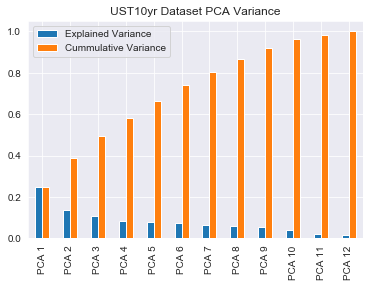

In [19]:
fig, ax = plt.subplots()
pca_var.plot.bar(x='PCA', title='UST10yr Dataset PCA Variance', ax=ax)
ax.set_xlabel('')

In [15]:
pca_var['Cummulative Variance'] = pca_var['Explained Variance'].cumsum()

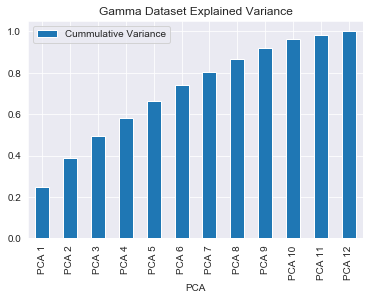

In [16]:
pca_var.plot.bar(x='PCA', y='Cummulative Variance', title='Gamma Dataset Explained Variance')

In [20]:
market_pca

array([[ 0.86986461, -2.46922966, -0.76970636, ...,  0.65841803,
        -0.87858435, -0.83092434],
       [-0.40161201, -0.3938077 , -1.63637939, ...,  1.65195718,
        -0.42018125,  1.29891271],
       [-3.32753759,  1.09257178, -1.34663499, ..., -0.51917067,
        -1.74763963,  1.25801086],
       ...,
       [-0.08781999, -0.94790087, -0.72306293, ..., -0.03567901,
         0.01083811, -0.53712063],
       [-0.87923138,  0.83541201, -1.85155746, ..., -0.27368725,
        -0.3303495 ,  0.42137563],
       [ 1.35323019,  0.39090593, -0.90939825, ..., -0.12896658,
         0.13521293,  0.10653038]])

In [21]:
market_pca_1 = market_pca[:,0]
market_pca_2 = market_pca[:,1]
market_pca_3 = market_pca[:,2]

In [22]:
market_pca_df = pd.DataFrame()
market_pca_df['PCA 1'] = market_pca_1
market_pca_df['PCA 2'] = market_pca_2
market_pca_df['PCA 3'] = market_pca_3
market_pca_df['Label'] = market_df['UST10 Next Day Direction']

##### PCA 1D

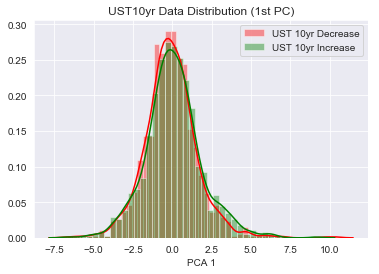

In [24]:
sns.distplot(market_pca_df[market_pca_df['Label'] == 0]['PCA 1'], label='UST 10yr Decrease', color='r')
sns.distplot(market_pca_df[market_pca_df['Label'] == 1]['PCA 1'], label='UST 10yr Increase', color='g')
plt.title('UST10yr Data Distribution (1st PC)')
plt.legend();

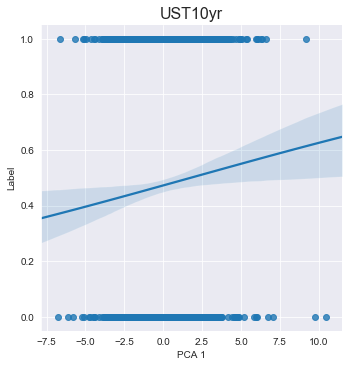

In [31]:
sns.lmplot(x='PCA 1', y='Label', data=market_pca_df, logistic=True)
plt.title('UST10yr', fontsize=16);

##### PCA 2D

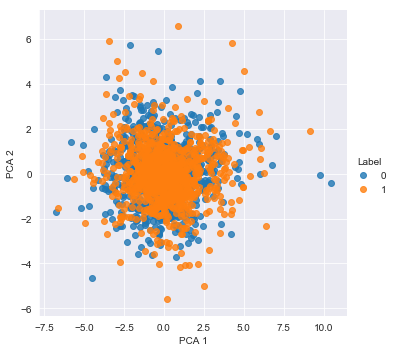

In [22]:
sns.lmplot(x='PCA 1', y='PCA 2', data=market_pca_df, hue='Label', fit_reg=False);

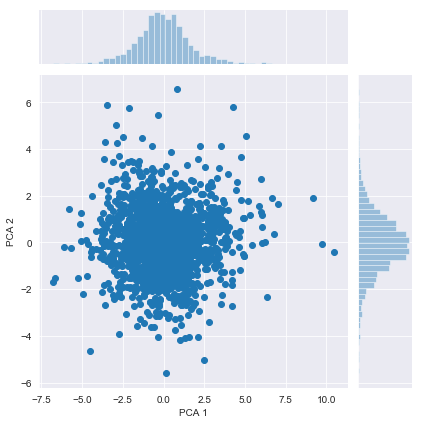

In [23]:
sns.jointplot(x='PCA 1', y='PCA 2', data=market_pca_df);

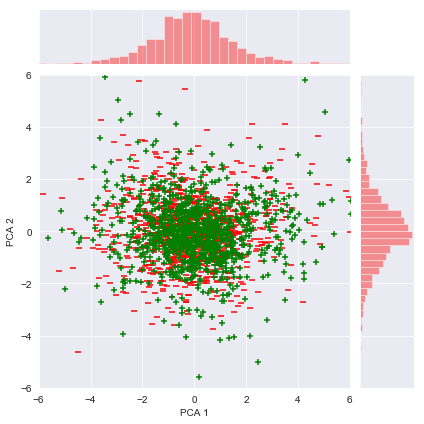

In [24]:
graph = sns.jointplot(x='PCA 1', y='PCA 2', data=market_pca_df[market_pca_df['Label'] == 0], xlim=(-6,6), ylim=(-6,6), color='r', marker='_');

graph.x = market_pca_df[market_pca_df['Label'] == 1]['PCA 1']
graph.y = market_pca_df[market_pca_df['Label'] == 1]['PCA 2']
graph.plot_joint(plt.scatter, marker='+', c='g', label='UST 10yr Increase');

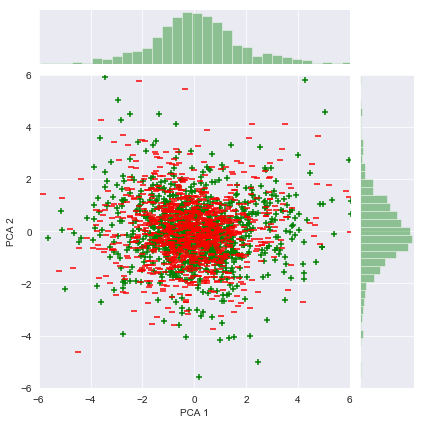

In [25]:
graph = sns.jointplot(x='PCA 1', y='PCA 2', data=market_pca_df[market_pca_df['Label'] == 1], xlim=(-6,6), ylim=(-6,6), color='g', marker='+');

graph.x = market_pca_df[market_pca_df['Label'] == 0]['PCA 1']
graph.y = market_pca_df[market_pca_df['Label'] == 0]['PCA 2']
graph.plot_joint(plt.scatter, c='r', marker='_', label='UST 10yr Decrease');

In [26]:
from mpl_toolkits import mplot3d

In [27]:
# https://stackoverflow.com/questions/40622203/how-to-plot-3d-gaussian-distribution-with-matplotlib
from scipy.stats import multivariate_normal

In [28]:
#pca1_pca2 = market_pca[:,:2]

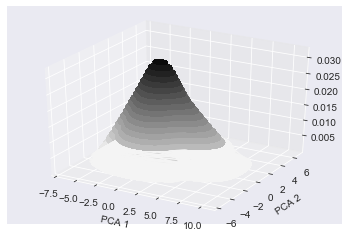

In [32]:
x, y = np.meshgrid(market_pca_1, market_pca_2)
xy = np.column_stack([x.flat, y.flat])

mu = np.array([np.mean(market_pca_1), np.mean(market_pca_2)])
sigma = np.array([np.var(market_pca_1), np.var(market_pca_2)])
covariance = np.diag(sigma**2)

z = multivariate_normal.pdf(xy, mean=mu, cov=covariance)
z = z.reshape(x.shape)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(x, y, z, 25, cmap='binary')
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2');

In [33]:
dec_pca_1 = np.asarray(market_pca_df[market_pca_df['Label'] == 0]['PCA 1'])
dec_pca_2 = np.asarray(market_pca_df[market_pca_df['Label'] == 0]['PCA 2'])

inc_pca_1 = np.asarray(market_pca_df[market_pca_df['Label'] == 1]['PCA 1'])
inc_pca_2 = np.asarray(market_pca_df[market_pca_df['Label'] == 1]['PCA 2'])

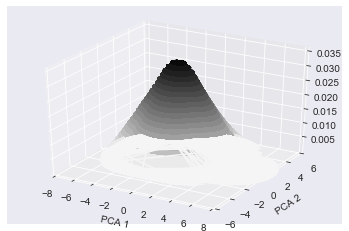

In [36]:
x, y = np.meshgrid(dec_pca_1, dec_pca_2)
xy = np.column_stack([x.flat, y.flat])

mu = np.array([np.mean(dec_pca_1), np.mean(dec_pca_2)])
sigma = np.array([np.var(dec_pca_1), np.var(dec_pca_2)])
covariance = np.diag(sigma**2)

z = multivariate_normal.pdf(xy, mean=mu, cov=covariance)
z = z.reshape(x.shape)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(x, y, z, 25, cmap='binary')
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2');
ax.set_xlim(-8,8)
ax.set_ylim(-6,6);

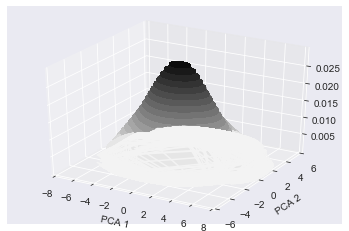

In [37]:
x, y = np.meshgrid(inc_pca_1, inc_pca_2)
xy = np.column_stack([x.flat, y.flat])

mu = np.array([np.mean(inc_pca_1), np.mean(inc_pca_2)])
sigma = np.array([np.var(inc_pca_1), np.var(inc_pca_2)])
covariance = np.diag(sigma**2)

z = multivariate_normal.pdf(xy, mean=mu, cov=covariance)
z = z.reshape(x.shape)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(x, y, z, 25, cmap='binary')
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2');
ax.set_xlim(-8,8)
ax.set_ylim(-6,6);

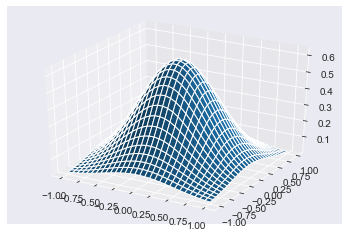

In [98]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import numpy as np
from scipy.stats import multivariate_normal

x, y = np.mgrid[-1.0:1.0:30j, -1.0:1.0:30j]

# Need an (N, 2) array of (x, y) pairs.
xy = np.column_stack([x.flat, y.flat])

mu = np.array([0.0, 0.0])

sigma = np.array([.5, .5])
covariance = np.diag(sigma**2)

z = multivariate_normal.pdf(xy, mean=mu, cov=covariance)

# Reshape back to a (30, 30) grid.
z = z.reshape(x.shape)





fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')



ax.plot_surface(x,y,z)
#ax.plot_wireframe(x,y,z)

plt.show()

In [100]:
xy

array([[-1.        , -1.        ],
       [-1.        , -0.93103448],
       [-1.        , -0.86206897],
       ...,
       [ 1.        ,  0.86206897],
       [ 1.        ,  0.93103448],
       [ 1.        ,  1.        ]])

##### PCA 3D

In [85]:
%matplotlib inline

No handles with labels found to put in legend.


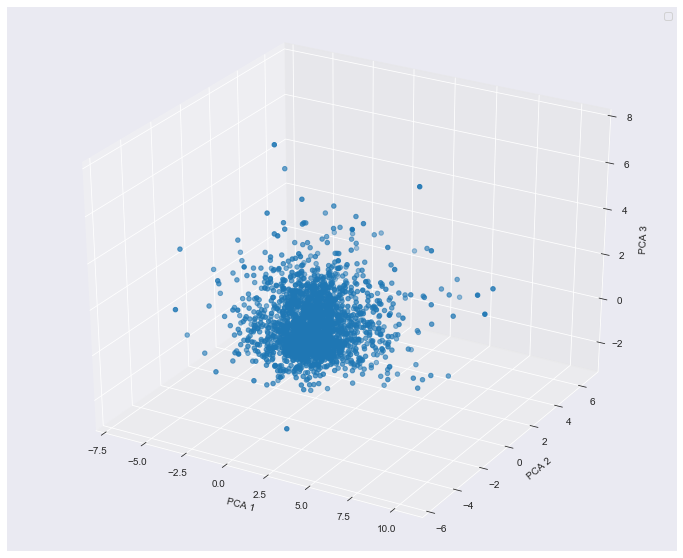

In [87]:
fig = plt.figure(figsize=(12,10))
ax = plt.axes(projection='3d')
ax.scatter3D(market_pca_1, market_pca_2, market_pca_3, cmap=market_pca_df['Label'])
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')
plt.legend();

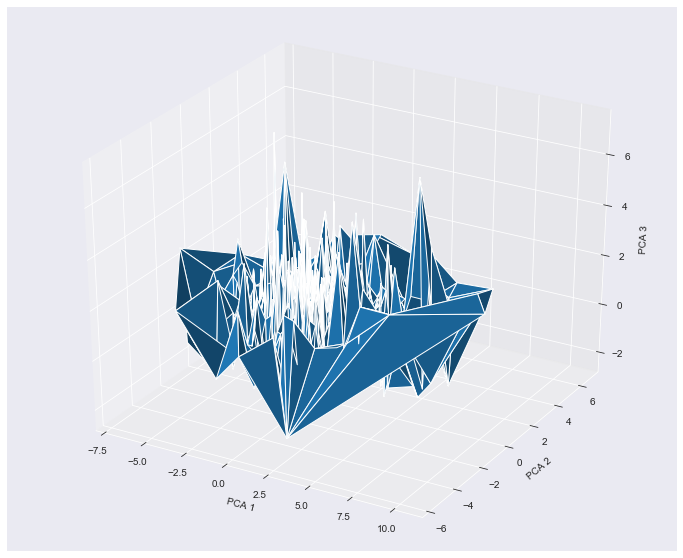

In [94]:
fig = plt.figure(figsize=(12,10))
ax = plt.axes(projection='3d')
ax.plot_trisurf(market_pca_1, market_pca_2, market_pca_3)
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3');

In [88]:
# https://stackoverflow.com/questions/40622203/how-to-plot-3d-gaussian-distribution-with-matplotlib
from scipy.stats import multivariate_normal